## imports lib : 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix



## Analyse explorative de la base de données

In [2]:
test = pd.read_csv("/workspaces/Analyse-de-donn-es/test.csv")
train = pd.read_csv("/workspaces/Analyse-de-donn-es/train-3.csv")
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

In [3]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.00,1,0,PC 17603,59.4000,NaN,C
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.00,0,0,29108,11.5000,NaN,S
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.00,0,0,13213,35.5000,A26,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
570,571,1,2,"Harris, Mr. George",male,62.00,0,0,S.W./PP 752,10.5000,NaN,S
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.00,0,0,S.O./P.P. 3,10.5000,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.00,0,0,112059,0.0000,B94,S
620,621,0,3,"Yasbeck, Mr. Antoni",male,27.00,1,0,2659,14.4542,NaN,C
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C


In [4]:
test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
115,1007,3,"Chronopoulos, Mr. Demetrios",male,18.0,1,0,2680,14.4542,NaN,C
298,1190,1,"Loring, Mr. Joseph Holland",male,30.0,0,0,113801,45.5000,NaN,S
165,1057,3,"Kink-Heilmann, Mrs. Anton (Luise Heilmann)",female,26.0,1,1,315153,22.0250,NaN,S
244,1136,3,"Johnston, Master. William Arthur Willie""""",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
157,1049,3,"Lundin, Miss. Olga Elida",female,23.0,0,0,347469,7.8542,NaN,S
46,938,1,"Chevre, Mr. Paul Romaine",male,45.0,0,0,PC 17594,29.7000,A9,C
90,982,3,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,1,0,347072,13.9000,NaN,S
164,1056,2,"Peruschitz, Rev. Joseph Maria",male,41.0,0,0,237393,13.0000,NaN,S
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


**traintement de la base de données train**

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


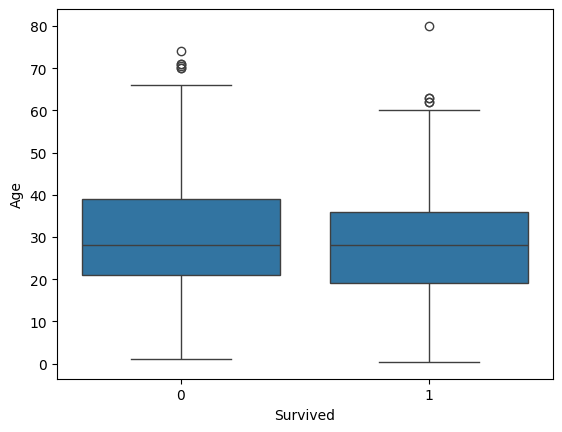

In [7]:
sb.boxplot(x='Survived', y='Age', data=train)
plt.show()

**Variables Transformation**

In [8]:
def transform_data(x):
    import re

    col_to_drop=['Name', 'Ticket', 'Cabin',   'Title']

#Transform data
    def age_spread():
        return np.random.randint(low=x.Age.mean()-x.Age.std(), high=x.Age.mean()+x.Age.std())

    x['Family_Size'] = 0
    x['Family_Size'] = x['Parch']+x['SibSp'] 
    x['Alone'] = 0
    x.loc[x.Family_Size == 0, 'Alone'] = 1

    x['Without_age'] = 0
    x.loc[x.Age.isna(), 'Without_age'] = 1


    name_title={}
    for i in range(len(x.Name)):
        a=x.Name.str.split(",")[i][1]
        name_title[x.Name[i]]=re.findall('^\s\w*.', a)

    titles=pd.DataFrame.from_dict(name_title, orient='index').reset_index()
    titles.columns= ['Name', 'Title']
    x=x.merge(titles, on='Name')
    list_title={'popular_titles':['Mr.', 'Master.', 'Miss.', 'Mrs.']}

    x['Title_cleared']='rare_titles'
    #train.Title.map(list_title)
    for k,v in list_title.items():
        for i in v:
            x.loc[x['Title'].str.contains(f'{i}'), 'Title_cleared'] = k

    x['Have_cabin'] = 1
    x.loc[x.Cabin.isna(), 'Have_cabin'] = 0
    x['Cabin_cleared']=x[x.Cabin.notna()]['Cabin'].str.replace('\d', '').map(lambda x: str(x.replace(' ',''))+'_'+str(len(x.replace(' ',''))))
    x.loc[x.Cabin_cleared.str.contains('A')|x.Cabin_cleared.str.contains('B')|x.Cabin_cleared.str.contains('C')|x.Cabin_cleared.str.contains('T'), 'Cabin_cleared']='ABC'
    x.loc[x.Cabin_cleared.str.contains('D')|x.Cabin_cleared.str.contains('E'), 'Cabin_cleared']='DE'
    x.loc[x.Cabin_cleared.str.contains('F')|x.Cabin_cleared.str.contains('G'), 'Cabin_cleared']='FG'
    
    x.Age=x.Age.fillna(age_spread())
    x.Fare=x.Fare.fillna(np.mean(train.Fare))
    x['Embarked']=x['Embarked'].fillna(x['Embarked'].mode()[0])

    x['Fare']=x['Fare'].astype(int)
    x['Age']=x['Age'].astype(int)
    
    x = pd.get_dummies(x, columns=['Cabin_cleared', 'Embarked', 'Sex', 'Title_cleared'])    

    x.drop(columns=col_to_drop, inplace=True)
    return x
    

<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:37: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:37: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_23145/4051746478.py:22: SyntaxWarning: invalid escape sequence '\s'
  name_title[x.Name[i]]=re.findall('^\s\w*.', a)
/tmp/ipykernel_23145/4051746478.py:37: SyntaxWarning: invalid escape sequence '\d'
  x['Cabin_cleared']=x[x.Cabin.notna()]['Cabin'].str.replace('\d', '').map(lambda x: str(x.replace(' ',''))+'_'+str(len(x.replace(' ',''))))


In [9]:
train = transform_data(train)
test = transform_data(test)

In [10]:
predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((694, 19), (197, 19), (694,), (197,))

In [11]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Alone,Without_age,...,Cabin_cleared_ABC,Cabin_cleared_DE,Cabin_cleared_FG,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_cleared_popular_titles,Title_cleared_rare_titles
0,1,0,3,22,1,0,7,1,0,0,...,False,False,False,False,False,True,False,True,True,False
1,2,1,1,38,1,0,71,1,0,0,...,True,False,False,True,False,False,True,False,True,False
2,3,1,3,26,0,0,7,0,1,0,...,False,False,False,False,False,True,True,False,True,False
3,4,1,1,35,1,0,53,1,0,0,...,True,False,False,False,False,True,True,False,True,False
4,5,0,3,35,0,0,8,0,1,0,...,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27,0,0,13,0,1,0,...,False,False,False,False,False,True,False,True,False,True
887,888,1,1,19,0,0,30,0,1,0,...,True,False,False,False,False,True,True,False,True,False
888,889,0,3,43,1,2,23,3,0,1,...,False,False,False,False,False,True,True,False,True,False
889,890,1,1,26,0,0,30,0,1,0,...,True,False,False,True,False,False,False,True,True,False


## Modélisation : 

**Models**

In [12]:
## logistic regression : 

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)


## SVC : 

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

## Decision tree : 

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

## Random Forest : 

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

## KNN : 

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

## Gradient Boosting : 

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


82.74
72.59
81.22
83.76
76.65
86.29


**ROC**

In [13]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVC', 'Decision Tree',
              'Random Forest',  
              'KNN', 'Gradient Boosting Classifier'],
    'Score': [acc_logreg, acc_svc, acc_decisiontree,
              acc_randomforest, 
              acc_knn, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Gradient Boosting Classifier,86.29
3,Random Forest,83.76
0,Logistic Regression,82.74
2,Decision Tree,81.22
4,KNN,76.65
1,SVC,72.59


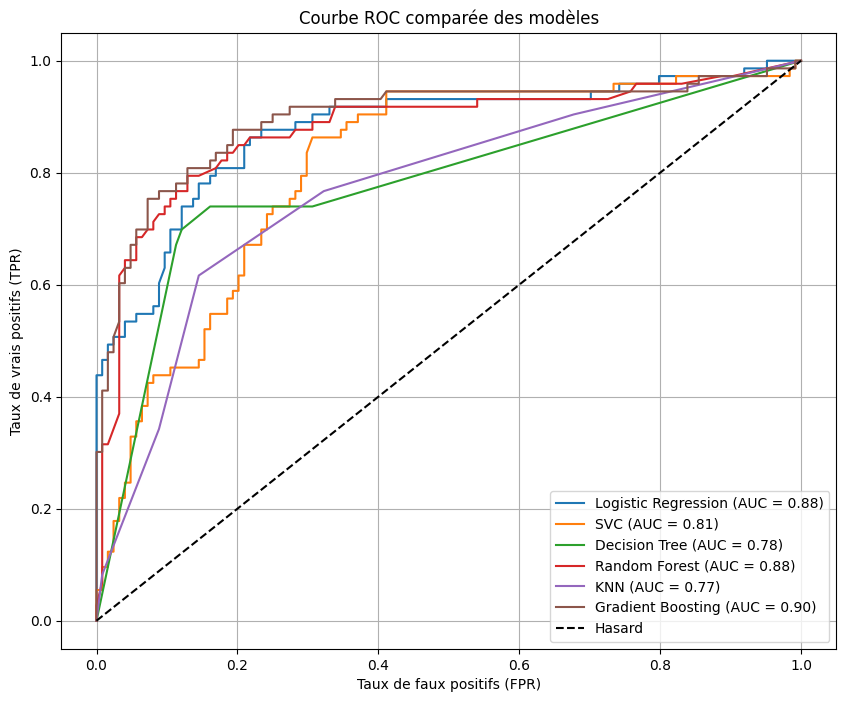

In [14]:

plt.figure(figsize=(10, 8))

# Logistic Regression
#logreg = LogisticRegression()
#logreg.fit(x_train, y_train)
y_score = logreg.predict_proba(x_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_score)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc(fpr, tpr)))

# SVC (attention : pas de predict_proba par défaut)
svc = SVC(probability=True)
svc.fit(x_train, y_train)
y_score = svc.predict_proba(x_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_score)
plt.plot(fpr, tpr, label='SVC (AUC = {:.2f})'.format(auc(fpr, tpr)))

# Decision Tree
#decisiontree = DecisionTreeClassifier()
#decisiontree.fit(x_train, y_train)
y_score = decisiontree.predict_proba(x_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_score)
plt.plot(fpr, tpr, label='Decision Tree (AUC = {:.2f})'.format(auc(fpr, tpr)))

# Random Forest
#randomforest = RandomForestClassifier()
#randomforest.fit(x_train, y_train)
y_score = randomforest.predict_proba(x_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_score)
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc(fpr, tpr)))

# KNN
#knn = KNeighborsClassifier()
#knn.fit(x_train, y_train)
y_score = knn.predict_proba(x_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_score)
plt.plot(fpr, tpr, label='KNN (AUC = {:.2f})'.format(auc(fpr, tpr)))

# Gradient Boosting
#gbk = GradientBoostingClassifier()
#gbk.fit(x_train, y_train)
y_score = gbk.predict_proba(x_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_score)
plt.plot(fpr, tpr, label='Gradient Boosting (AUC = {:.2f})'.format(auc(fpr, tpr)))

# Courbe aléatoire (baseline)
plt.plot([0, 1], [0, 1], 'k--', label='Hasard')

# Mise en forme
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC comparée des modèles')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [15]:

ids = test['PassengerId']
predictions_gbk = gbk.predict(test.drop('PassengerId', axis=1))
output_gbk = pd.DataFrame({'PassengerId': ids, 'Survived': predictions_gbk})
output_gbk.to_csv('/workspaces/Analyse-de-donn-es/gender_submission.csv', index=False)